In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Research papers /DOGE-USD.csv')  # Replace 'doge_price_data.csv' with your dataset filename

# Extract the 'Close' prices for prediction
data = df['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)

# Build the autoencoder model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length, 1)),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
    tf.keras.layers.RepeatVector(seq_length),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, X_test)
print(f'Test Loss: {loss}')

# Generate predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_inv = scaler.inverse_transform(predictions.reshape(-1, 1))


Epoch 1/50
8/8 [==============================] - 6s 115ms/step - loss: 0.0725 - val_loss: 0.0276
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0527 - val_loss: 0.0125
Epoch 3/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0312 - val_loss: 0.0132
Epoch 4/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0251 - val_loss: 0.0073
Epoch 5/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0222 - val_loss: 0.0056
Epoch 6/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0196 - val_loss: 0.0070
Epoch 7/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0172 - val_loss: 0.0043
Epoch 8/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0146 - val_loss: 0.0036
Epoch 9/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0122 - val_loss: 0.0031
Epoch 10/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0093 - val_loss: 0.0030
Epoch 11/50
8/8 [===========

Epoch 1/50
8/8 [==============================] - 7s 109ms/step - loss: 0.0713 - val_loss: 0.0265
Epoch 2/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0490 - val_loss: 0.0095
Epoch 3/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0271 - val_loss: 0.0132
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0230 - val_loss: 0.0060
Epoch 5/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0213 - val_loss: 0.0064
Epoch 6/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0190 - val_loss: 0.0059
Epoch 7/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0163 - val_loss: 0.0041
Epoch 8/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0125 - val_loss: 0.0029
Epoch 9/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0101 - val_loss: 0.0027
Epoch 10/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0081 - val_loss: 0.0024
Epoch 11/50
8/8 [===========

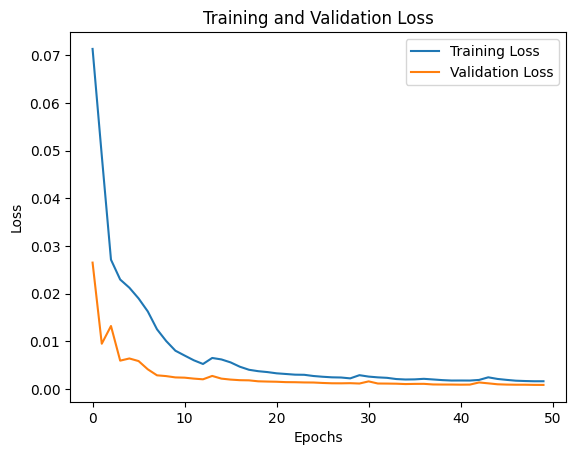

2/2 [==============================] - 0s 12ms/step - loss: 6.8019e-04
Test Loss: 0.0006801877170801163
2/2 [==============================] - 1s 12ms/step


ValueError: ignored

<Figure size 1200x600 with 0 Axes>

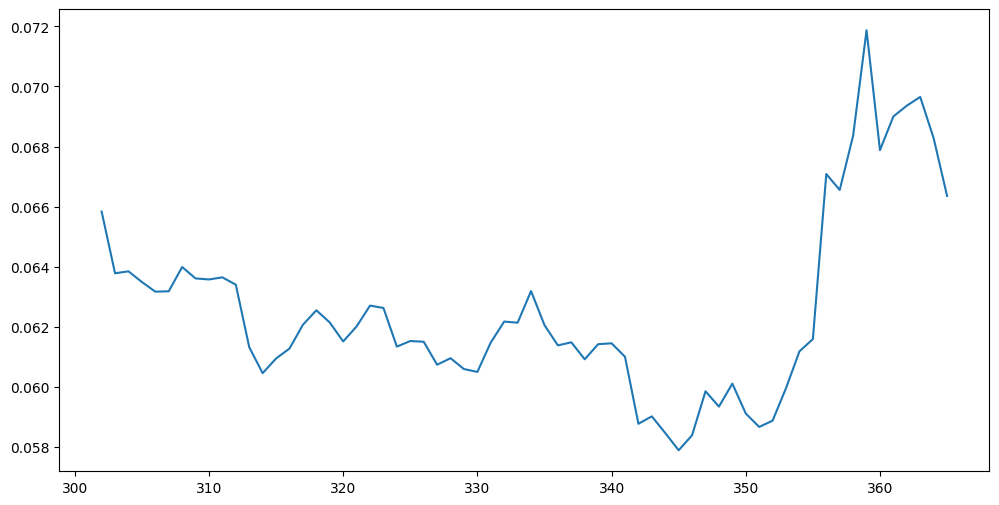

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Research papers /DOGE-USD.csv')  # Replace 'doge_price_data.csv' with your dataset filename

# Extract the 'Close' prices for prediction
data = df['Close'].values.reshape(-1, 1)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)

# Build the autoencoder model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_length, 1)),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=False),
    tf.keras.layers.RepeatVector(seq_length),
    tf.keras.layers.LSTM(32, activation='relu', return_sequences=True),
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1))
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
loss = model.evaluate(X_test, X_test)
print(f'Test Loss: {loss}')

# Generate predictions on the test set
predictions = model.predict(X_test)

# Inverse transform the predictions to the original scale
predictions_inv = scaler.inverse_transform(predictions.reshape(-1, 1))

# Plot actual vs. predicted prices on the test set
plt.figure(figsize=(12, 6))
dates = df.index[train_size + seq_length:]

# Ensure the dimensions match
actual_prices = scaler.inverse_transform(test_data[seq_length:]).reshape(-1)
predicted_prices = predictions_inv.reshape(-1)

# Plot actual vs. predicted prices on the test set
plt.figure(figsize=(12, 6))
dates = df.index[train_size + seq_length:]

# Ensure the dimensions match
actual_prices = scaler.inverse_transform(test_data[seq_length:]).reshape(-1)
predicted_prices = predictions_inv.reshape(-1)

plt.plot(dates, actual_prices, label='Actual Prices')
plt.plot(dates[:len(predicted_prices)], predicted_prices, label='Predicted Prices')  # Trim to match dimensions
plt.title('Actual vs. Predicted Dogecoin Prices')
plt.xlabel('Date')
plt.ylabel('Dogecoin Price')
plt.legend()
plt.show()


